In [1]:
import pandas as pd
import os

os.chdir("../../")

from src import display_df

In [2]:
completed_orders = pd.read_csv("data/completed_orders.csv")
drivers_location = pd.read_csv("data/drivers_location_during_request.csv")

In [3]:
completed_orders.head(7)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12


In [4]:
drivers_location.head(10)

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


#### Analyze completed orders information

In [5]:
# get the informtion of completed orders data
completed_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [6]:
# Check missing values in completed_orders
completed_orders.isnull().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

##### Analyze drivers location info

In [7]:
# Check missing values for drivers_location
drivers_location.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

### Perform data preprocessing

In [3]:
from src.preprocess_data import GokadaDataPreprocessor

In [4]:
completed_orders_path = 'data/completed_orders.csv'
drivers_location_path = 'data/drivers_location_during_request.csv'

preprocessor = GokadaDataPreprocessor(completed_orders_path, drivers_location_path)


In [5]:
preprocessed_df = preprocessor.preprocess_and_save('processed_data.csv')

KeyboardInterrupt: 

In [ ]:
display_df(preprocessed_df)
df = preprocessed_df

| order_id   | trip_origin         | trip_destination    | trip_start_time     | trip_end_time       | id   | driver_id   | driver_action   | drivers_lat   | drivers_lon   | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_duration   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | trip_duration_zscore   | is_holiday   |
|:-----------|:--------------------|:--------------------|:--------------------|:--------------------|:-----|:------------|:----------------|:--------------|:--------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-----------------------|:-------------|
| 392001     | 6.6010417,3.2766339 | 6.4501069,3.3916154 | 2021-07-01 09:30:59 | 2021-07-01 09:34:36 | 1    | 243828  

In [10]:
df = completed_orders

In [11]:
display_df(df)

| Trip ID   | Trip Origin                        | Trip Destination                | Trip Start Time     | Trip End Time       |
|:----------|:-----------------------------------|:--------------------------------|:--------------------|:--------------------|
| 391996    | 6.508813001668548,3.37740316890347 | 6.650969799999999,3.3450307     | 2021-07-01 07:28:04 | 2021-07-01 07:29:37 |
| 391997    | 6.4316714,3.4555375                | 6.4280814653326,3.4721885847586 | 2021-07-01 06:38:04 | 2021-07-01 07:07:28 |
| 391998    | 6.631679399999999,3.3388976        | 6.508324099999999,3.3590397     | 2021-07-01 06:21:02 | 2021-07-01 07:02:23 |
| 391999    | 6.572757200000001,3.3677082        | 6.584881099999999,3.3614073     | 2021-07-01 07:16:07 | 2021-07-01 07:29:42 |
| 392001    | 6.6010417,3.2766339                | 6.4501069,3.3916154             | 2021-07-01 09:30:59 | 2021-07-01 09:34:36 |


In [16]:
# Impute 'Trip Start Time' with median
df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'])
median_start_time = df['Trip Start Time'].median()
df['Trip Start Time'].fillna(median_start_time, inplace=True)

In [ ]:
# 

In [18]:
from datetime import datetime
import holidays

def is_holiday_from_start_time(datetime_obj, country_code='NG'):
    try:
        # Check if the input is a pandas NaT (Not a Time) or None
        if pd.isnull(datetime_obj):
            print(f"Invalid datetime: {datetime_obj}")
            return 0
        # Assuming datetime_obj is already a datetime object, no need to parse it
        dt = datetime_obj.date()
        country_holidays = holidays.country_holidays(country_code)
        return 1 if dt in country_holidays else 0
    except Exception as e:
        print(f"Unexpected error: {e} for datetime_obj: {datetime_obj}")
        return 0

# Example usage (assuming df is the DataFrame and it's already converted to datetime format)
df['is_holiday'] = df['Trip Start Time'].apply(lambda x: is_holiday_from_start_time(x))

In [19]:
df['is_holiday'].value_counts()

0    519803
1     16217
Name: is_holiday, dtype: int64

In [8]:
display_df(completed_orders)

| Trip ID   | Trip Origin                        | Trip Destination                | Trip Start Time     | Trip End Time       |
|:----------|:-----------------------------------|:--------------------------------|:--------------------|:--------------------|
| 391996    | 6.508813001668548,3.37740316890347 | 6.650969799999999,3.3450307     | 2021-07-01 07:28:04 | 2021-07-01 07:29:37 |
| 391997    | 6.4316714,3.4555375                | 6.4280814653326,3.4721885847586 | 2021-07-01 06:38:04 | 2021-07-01 07:07:28 |
| 391998    | 6.631679399999999,3.3388976        | 6.508324099999999,3.3590397     | 2021-07-01 06:21:02 | 2021-07-01 07:02:23 |
| 391999    | 6.572757200000001,3.3677082        | 6.584881099999999,3.3614073     | 2021-07-01 07:16:07 | 2021-07-01 07:29:42 |
| 392001    | 6.6010417,3.2766339                | 6.4501069,3.3916154             | 2021-07-01 09:30:59 | 2021-07-01 09:34:36 |


In [11]:
import pandas as pd
from datetime import datetime

# Define your function to calculate trip duration in seconds
def calculate_trip_duration_in_seconds(start_time_str, end_time_str, time_format='%Y-%m-%d %H:%M:%S'):
  start_time = datetime.strptime(start_time_str, time_format)
  end_time = datetime.strptime(end_time_str, time_format)
  duration = end_time - start_time
  return duration.total_seconds()

# Calculate trip duration for each row
df['Trip Duration (seconds)'] = df.apply(lambda row: calculate_trip_duration_in_seconds(row['Trip Start Time'], row['Trip End Time']), axis=1)

print(df[['Trip ID', 'Trip Duration (seconds)']])

   Trip ID  Trip Duration (seconds)
0   391996                     93.0
1   391997                   1764.0
2   391998                   2481.0
3   391999                    815.0
4   392001                    217.0


In [14]:
# Check for missing values
preprocessed_df.isnull().sum()

order_id                      0
trip_origin                   0
trip_destination              0
trip_start_time               0
trip_end_time                 0
id                            0
driver_id                     0
driver_action                 0
drivers_lat                   0
drivers_lon                   0
day_of_week                   0
hour_of_day                   0
day_of_month                  0
month                         0
trip_start_date               0
trip_end_date                 0
trip_duration                 0
trip_origin_latitude          0
trip_origin_longitude         0
trip_destination_latitude     0
trip_destination_longitude    0
dtype: int64

#### Check for outliers

In [15]:
# import matplotlib.pyplot as plt

# # Assuming 'data' is a Pandas Series or a list of values
# plt.boxplot(df)
# plt.title('Boxplot of Data')
# plt.ylabel('Values')
# # Customize the x-axis label as needed
# plt.xlabel('Data Category')
# plt.show()

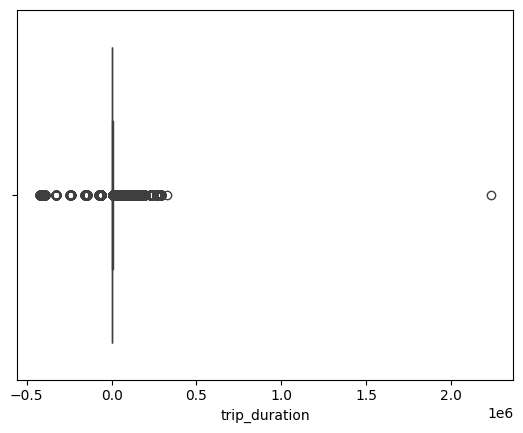

Outliers using Z-score: [  51887   51888   51889 ... 1557144 1557145 1557146]
Outliers using IQR method:
         order_id                  trip_origin             trip_destination  \
226       392021          6.5943334,3.3007843  6.429098199999999,3.4238032   
227       392021          6.5943334,3.3007843  6.429098199999999,3.4238032   
228       392021          6.5943334,3.3007843  6.429098199999999,3.4238032   
229       392021          6.5943334,3.3007843  6.429098199999999,3.4238032   
230       392021          6.5943334,3.3007843  6.429098199999999,3.4238032   
...          ...                          ...                          ...   
1557226   448558  6.521553600000001,3.3150125          6.4986693,3.3454519   
1557227   448558  6.521553600000001,3.3150125          6.4986693,3.3454519   
1557228   448558  6.521553600000001,3.3150125          6.4986693,3.3454519   
1557229   448558  6.521553600000001,3.3150125          6.4986693,3.3454519   
1557230   448558  6.521553600000001,

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'preprocessed_df' is your DataFrame and 'column' is the column you want to check for outliers

# Visual Inspection
# Box Plot
sns.boxplot(x=preprocessed_df['trip_duration'])
plt.show()

# Statistical Methods
# Z-score
z_scores = np.abs(stats.zscore(preprocessed_df['trip_duration']))
outliers_z = np.where(z_scores > 3)

# IQR
Q1 = preprocessed_df['trip_duration'].quantile(0.25)
Q3 = preprocessed_df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = preprocessed_df[(preprocessed_df['trip_duration'] < (Q1 - 1.5 * IQR)) | (preprocessed_df['trip_duration'] > (Q3 + 1.5 * IQR))]

# Print outlier indices
print("Outliers using Z-score:", outliers_z[0])
print("Outliers using IQR method:\n", outliers_iqr)

In [17]:
print(Q1)
print(Q3)

1721.0
3931.0


In [18]:
import numpy as np

# 1. Calculate z-scores
df['trip_duration_zscore'] = np.abs((df['trip_duration'] - df['trip_duration'].mean()) / df['trip_duration'].std())

# 2. Identify outliers using a z-score threshold
zscore_threshold = 3
outliers = df[df['trip_duration_zscore'] > zscore_threshold]
print(outliers.head().to_markdown(index=False, numalign="left", stralign="left"))

# 3. Optionally, filter out the outliers to create a new DataFrame
filtered_df = df[df['trip_duration_zscore'] <= zscore_threshold].copy()


| order_id   | trip_origin                     | trip_destination    | trip_start_time     | trip_end_time       | id    | driver_id   | driver_action   | drivers_lat   | drivers_lon   | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_duration   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | trip_duration_zscore   |
|:-----------|:--------------------------------|:--------------------|:--------------------|:--------------------|:------|:------------|:----------------|:--------------|:--------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-----------------------|
| 394447     | 6.4371758130759,3.5097476821616 | 6.4430658,3.5380258 | 2021-07-06 10:27:06 | 2021-07-01 13:05:02 | 51888 |

In [19]:
len(outliers)

15762

In [20]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557740 entries, 4 to 1585113
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   order_id                    1557740 non-null  object        
 1   trip_origin                 1557740 non-null  object        
 2   trip_destination            1557740 non-null  object        
 3   trip_start_time             1557740 non-null  datetime64[ns]
 4   trip_end_time               1557740 non-null  datetime64[ns]
 5   id                          1557740 non-null  float64       
 6   driver_id                   1557740 non-null  float64       
 7   driver_action               1557740 non-null  object        
 8   drivers_lat                 1557740 non-null  float64       
 9   drivers_lon                 1557740 non-null  float64       
 10  day_of_week                 1557740 non-null  object        
 11  hour_of_day             